<a href="https://colab.research.google.com/github/vlad-uve/CAE-MNIST/blob/main/notebooks/CAE_experiment_1(filters).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Autoencoder (CAE) — Experiment #1: Different Number of Convolutional Filters

This notebook explores the impact of varying the number of convolutional filters in the CAE architecture on reconstruction quality of MNSIT digits and training behavior.

---

## 📌 Objective

To investigate how changing the number of filters in each convolutional layer affects the training dynamics, the model's ability to learn meaningful latent representations to accurately reconstruct MNIST digits, and the number of model parameters. And to compare the results with the baseline model.

---

## 🔁 Experiment Workflow

1. Clone the project and configure dependencies  
2. Define multiple CAE variants with different convolutional filter configurations  
3. Train each variant over 20 epochs using the Adam optimizer  
4. Analyze training and validation losses, and compare reconstruction quality with the base line model  
5. Make conclusions
6. Export results to GitHub

---

## 📊 Key Findings

- Filters width directly influences the model's reconstruction ability
- Wider filters slightly improve reconstruction loss and sharpness, but with high computational cost  
- Narrower filters are more efficient, with a small tradeoff in detail quality

---

## 1. 🔧 Setup

This section prepares the environment for running the experiment.

- Clone the GitHub repository  
- Import model classes and utility functions from `src/`  
- Import necessary libraries  
- Define constants

## 2. 🧠 Define Experiment Models

This section defines two CAE variants to evaluate the effect of varying the number of convolutional filters:

- `experiment_1_model_1`: `n_channels = [16, 32, 32]` (Narrow filters model)  
- `experiment_1_model_2`: `n_channels = [32, 64, 128]` (Wide filters model)

**🟩 Baseline model number of filters:** `n_channels = [32, 32, 64]`

All other remains consistent with the baseline model, including:

- Latent dimension: 32`
- Batch sizes: 32 (train) / 500 (validation)
- Activation: ReLU  
- Optimizer: Adam (`lr = 1e-3`)  
- Scheduler: `ReduceLROnPlateau`  
- Epochs: 20  

## 3. 🏋️‍♀️ Train Experiment Models

Each architecture defined in this experiment is trained sequentially using the `run_model_training()` function.

For each configuration:
- A model is initialized with its respective `n_channels` setting
- The optimizer (`Adam`) and scheduler (`ReduceLROnPlateau`) are redefined to track validation loss
- The model is trained for 20 epochs using the same dataloaders as in the baseline
- Training and validation losses are logged
- The final model and its loss history are stored for later analysis and comparison

## 4. 🔍 Results and Observations

This section presents the training dynamics and reconstruction outcomes across all model variants.

### 4.1 📉 Loss Curves Analysis
- All models converged within the first 10 epochs, confirming that 20 training epochs is sufficient for MNIST  
- The **wide filters model** (`[32, 64, 128]`) achieved the **lowest reconstruction loss**, marginally outperforming the baseline  
- The **narrow filters model** (`[16, 32, 32]`) resulted in slightly higher final loss compared to baseline  
- Despite the differences in filter size, **all models plateaued at similar epochs** and the performance gap remained modest

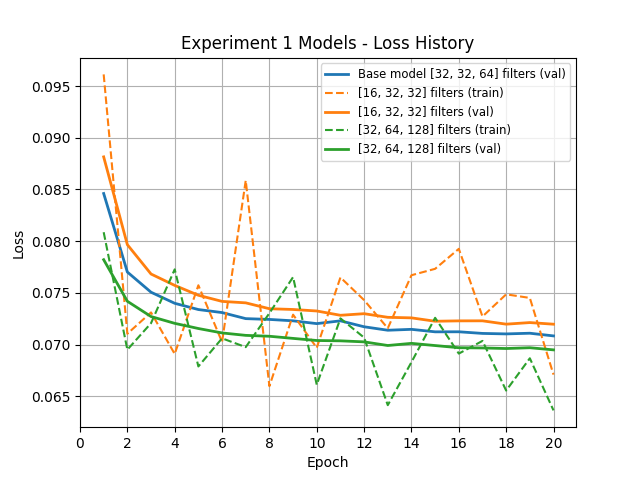

In [ ]:
display(Image(filename="CAE-MNIST/outputs/experiment_1_files/experiment_1_image_loss.png"))

### 4.2 📷 Reconstruction Quality Analysis

- The **narrow filter model** reconstructs digits with comparable clarity to the baseline, though some edges appear slightly less defined
- The **wide filter model** produces **sharper and more precise reconstructions**, with finer contours and reduced discrepancies from the original images



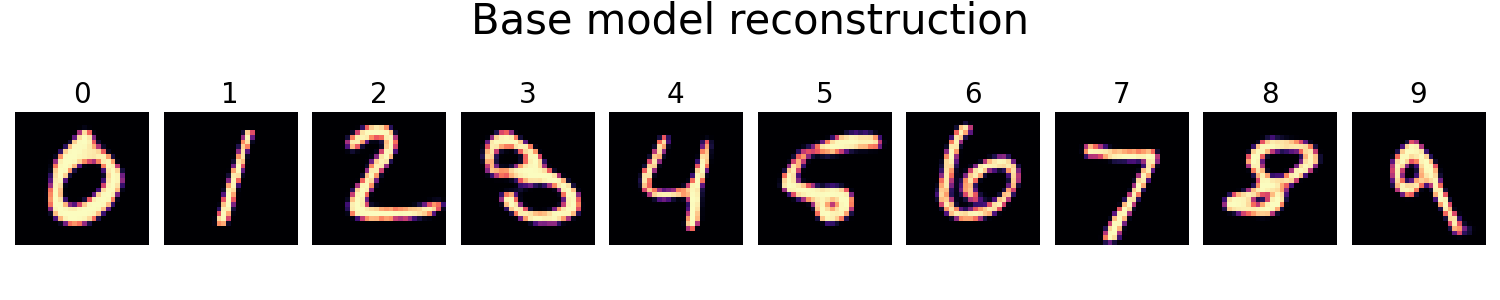

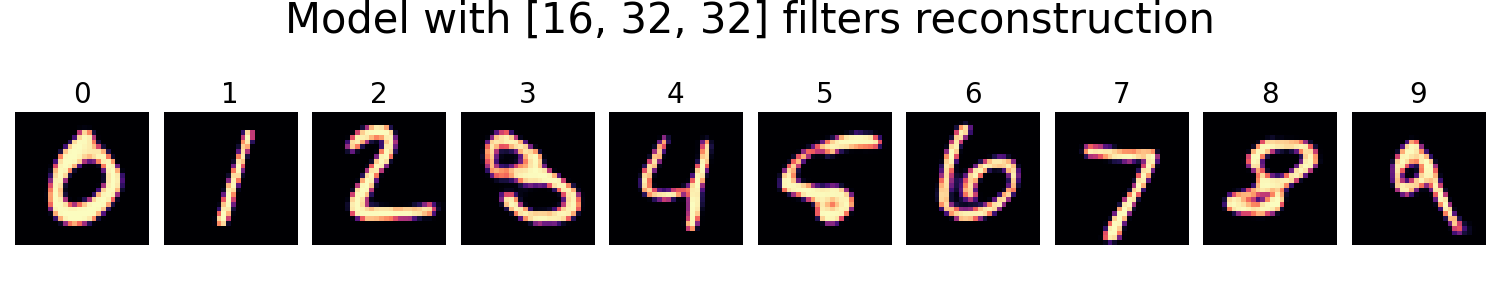

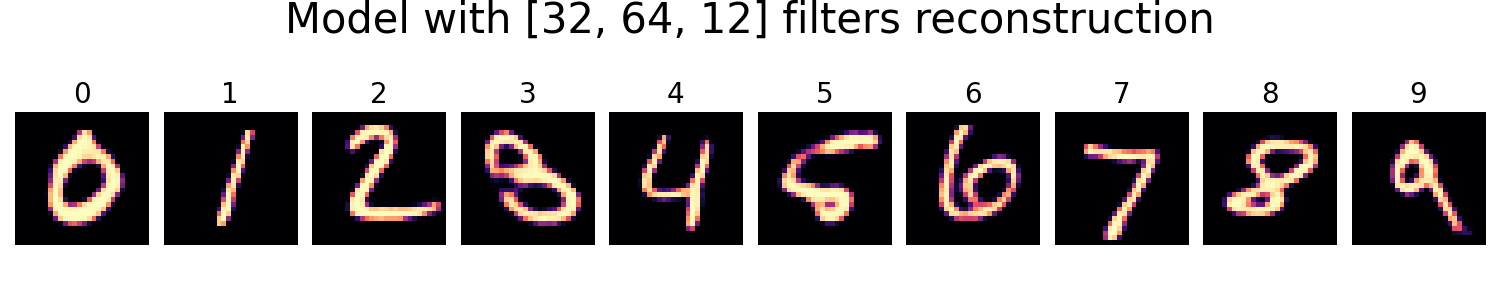

In [13]:
display_reconstruction_images(1, len(experiment_1_models))

### 4.3 🧮 Model Complexity Analysis
The wider number of convolutional filters significantly increase the number of model's parameters. The narrow filters model has twice as fewer parameters than the baseline model (69k vss 137k). In its turn, the wider filters model has twice as many, that it 349k parameters.

- **Parameters of model with [16, 32, 32] filters:** ~69K
- **Parameters of base model with [32, 32, 64] filters:** ~137K
- **Parameters of model with [32, 64, 129] filters:** ~349K

## 5. ✅ Conclusion

This experiment confirms that increasing the number of convolutional filters can lead to a marginal improvement in reconstruction quality. The wide filter model achieves slightly better loss values and produces crisper digit reconstructions.

However, this gain is **nearly imperceptible to the human eye** and comes at the cost of significantly higher model complexity. For a lightweight task such as MNIST digit reconstruction, this tradeoff is not justified.

Among the three models, the **narrow filter model** offers the best balance of efficiency and performance, making it the **most favorable choice** in resource-constrained scenarios.

---
---

# 🛠️ Notebook Workflow

The sections below contain the actual code used to define, train, and evaluate the variant CAE models for this experiment. This includes model setup, training logic, and result generation. These blocks serve as the working core of the notebook and support the summary presented above

## 1. 🔧 Setup

In [1]:
from getpass import getpass

# get repo url
token = getpass("Paste your GitHub token")
user_name = 'vlad-uve'
repo_name = 'CAE-MNIST'
repo_url = f"https://{token}@github.com/{user_name}/{repo_name}.git"

# clone the repo
!git config --global user.email "vladislav.yushkevich.uve@gmail.com"
!git config --global user.name "vlad_uve"
!git clone {repo_url}

# append system path
import sys
sys.path.append('/content/CAE-MNIST')

Paste your GitHub token··········
Cloning into 'CAE-MNIST'...
remote: Enumerating objects: 903, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 903 (delta 130), reused 120 (delta 59), pack-reused 663 (from 2)
Receiving objects: 100% (903/903), 33.39 MiB | 20.03 MiB/s, done.
Resolving deltas: 100% (454/454), done.


In [2]:
# import core model components
from src.model import AutoEncoder, Encoder, Decoder

# import training utilities
from src.train import train_model, validate_model, run_model_training

# import data loading functions
from src.data import get_train_dataloader, get_validation_dataloader

# import evaluation helpers
from src.evaluation import get_experiment_reconstructions, get_image_samples

# import plotting functions
from src.plotting import plot_digits_row, plot_experiment_reconstructions, plot_experiment_history, display_reconstruction_images

# import exporting functions
from src.export import save_experiment_files, export_experiment_files

In [3]:
# OS and file utilities
import os
import shutil

# PyTorch core modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Data loading and transformations
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Model summary utility
from torchsummary import summary

# Learning rate scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Plotting
import matplotlib.pyplot as plt

# Import utility to display images directly in notebook
from IPython.display import Image, display

In [4]:
# set device to GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# set random seed for reproducibility
torch.manual_seed(0)

## 2. 🧠 Define Experiment Models



In [9]:
# load baseline model description from file
base_model_files_path = '/content/CAE-MNIST/outputs/base_model_files'
with open(os.path.join(base_model_files_path, 'base_description.txt'), 'r') as f:
    base_description = f.read()

# print baseline model description
print(base_description)

Baseline model configuration:
- Architecture: n_channels = [32, 32, 64], latent_dim = 32
- Batch normalization: False
- Activation function: ReLU
- Optimizer: Adam (lr = 1e-3)
- Scheduler: ReduceLROnPlateau (patience = 3, factor = 0.5, threshold = 1e-3)
- Training: 20 epochs
- Train batch size: 32
- Validation batch size: 500


In [10]:
# define base model parameters
base_latent_dim = 32
base_train_batch_size = 32
base_validation_batch_size = 500
base_num_epoch = 20

# load training and validation dataloaders with base batch sizes
base_train_dataloader = get_train_dataloader(batch_size=base_train_batch_size, data_dir='../data')
base_validation_dataloader = get_validation_dataloader(batch_size=base_validation_batch_size, data_dir='../data')

In [11]:
# define experiment 1 description: testing different convolution filter configurations
experiment_1_description = """
Experiment 1: effect of number of convolution filters
Two alternative architectures:
experiment_1_model_1: n_channels = [16, 32, 32]
experiment_1_model_2: n_channels = [32, 64, 128]
Other parameters are the same as for the base line model
"""
print(experiment_1_description.strip())

# initialize storage for experiment 1 results
experiment_1_losses = []
experiment_1_models = []

# define list of convolutional filter configurations to test
experiment_1_n_channels = [[16, 32, 32], [32, 64, 128]]

Experiment 1: effect of number of convolution filters
Two alternative architectures:
experiment_1_model_1: n_channels = [16, 32, 32]
experiment_1_model_2: n_channels = [32, 64, 128]
Other parameters are the same as for the base line model


## 3. 🏋️‍♀️ Train Experiment Models

In [ ]:
# run experiments with different architectures
for n_channels_i in experiment_1_n_channels:
    # create model with specific architecture
    model = AutoEncoder(
        n_channels=n_channels_i,
        latent_dim=base_latent_dim
    ).to(device)

    # define optimizer and scheduler
    base_optimizer = optim.Adam(model.parameters(), lr=1e-3)
    base_scheduler = ReduceLROnPlateau(
        base_optimizer,
        mode='min',
        threshold=1e-3,
        patience=3,
        factor=0.5
    )

    # train model
    model, loss_history = run_model_training(
        model=model,
        train_dataloader=base_train_dataloader,
        validation_dataloader=base_validation_dataloader,
        optimizer=base_optimizer,
        scheduler=base_scheduler,
        num_epoch=base_num_epoch,
        device=device
    )

    # record results
    experiment_1_losses.append(loss_history)
    experiment_1_models.append(model)

## 4. 🔍 Results and Observations

### 4.1 📉 Loss Curves

In [ ]:
# import base loss
base_loss = torch.load('/content/CAE-MNIST/outputs/base_model_files/base_loss.pth')

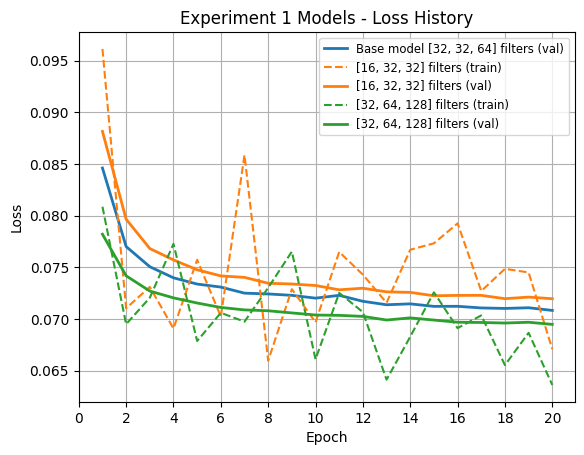

In [ ]:
# plot baseeline validation loss
plot_experiment_history([base_loss], label_list=['Base model [32, 32, 64] filters'])

# plot training and validation losses for experiment 1 models
plot_experiment_history(
    loss_list=experiment_1_losses,
    label_list=['[16, 32, 32] filters', '[32, 64, 128] filters'],
    color=plt.get_cmap('tab10').colors[1:],
    to_plot_train=True
)

# format plot
#plt.xlim(1, base_num_epoch)
plt.xticks(range(0, base_num_epoch+1, 2))
plt.legend(fontsize='small')
plt.title('Experiment 1 Models - Loss History')
plt.grid()

# save plot
plt.savefig("CAE-MNIST/outputs/experiment_1_files/experiment_1_image_loss.png")
plt.show()

In [ ]:
#manually add and push experiment 1 loss curve image to Git repository
!git -C /content/CAE-MNIST add outputs/experiment_1_files/experiment_1_image_loss.png
!git -C /content/CAE-MNIST commit -m "Add experiment 1 loss history curve"
!git -C /content/CAE-MNIST push origin main

### 4.2 📷 Reconstruction Quality Analysis

In [ ]:
# get sample images and labels
sample_images, sample_labels = get_image_samples(base_validation_dataloader)

# get reconstructed images from experiment 1
experiment_1_reconstructions=get_experiment_reconstructions(experiment_1_models,sample_images, device)

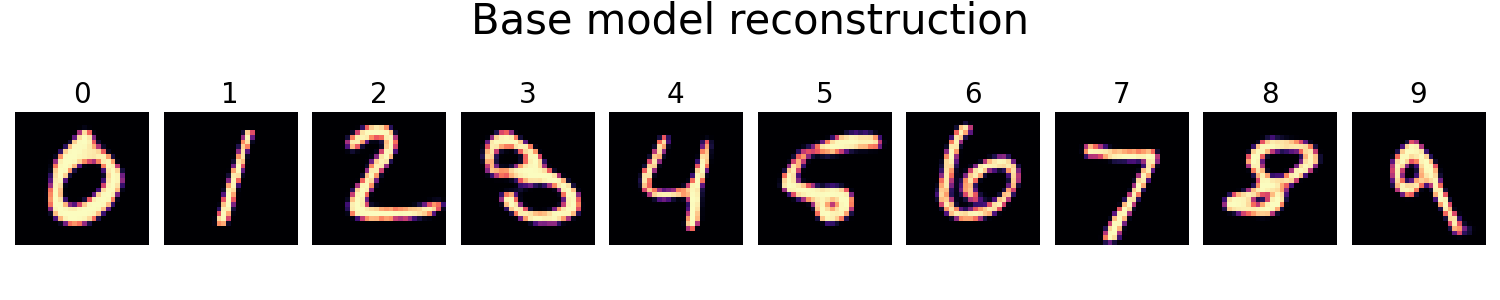

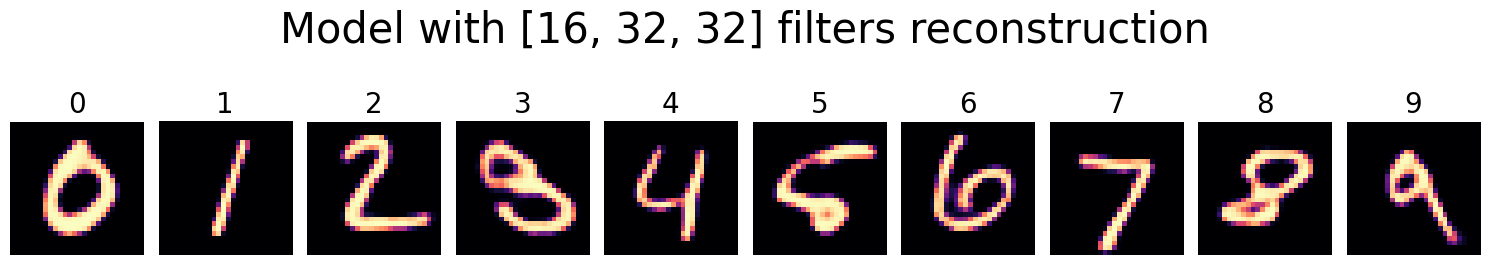

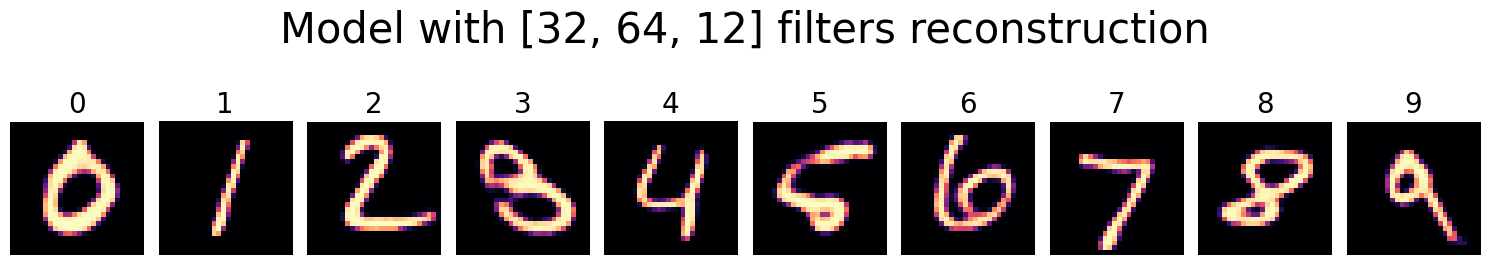

In [ ]:
# display original benchmark images
display(Image(filename='/content/CAE-MNIST/outputs/base_model_files/base_image_reconstruction.png'))
print('\n')

# display reconstructions from experiment
experiment_1_reconstruction_figures = plot_experiment_reconstructions(
    experiment_1_reconstructions,
    sample_labels,
    title_list=[
        'Model with [16, 32, 32] filters',
        'Model with [32, 64, 12] filters'
        ]
    )

for idx, fig in enumerate(experiment_1_reconstruction_figures):

  fig.savefig(f"CAE-MNIST/outputs/experiment_1_files/experiment_1_image_reconstruction_{idx+1}.png")

In [ ]:
#manually add and push experiment 1 reconstruction images to Git repository
for idx, _ in enumerate(experiment_1_reconstruction_figures):
  !git -C /content/CAE-MNIST add outputs/experiment_1_files/experiment_1_image_reconstruction_{idx+1}.png

!git -C /content/CAE-MNIST commit -m "Add experiment 1 reconstructed digits"
!git -C /content/CAE-MNIST push origin main

### 4.3 🧮 Model Complexity Analysis

In [ ]:
# dictionary of model parameters in experiment 5
experiment_1_param_counts = {}

for i, model in enumerate(experiment_1_models):
    param_count = sum(p.numel() for p in model.parameters() if p.requires_grad)
    model_name = f"experiment_1_model_{i+1}"
    experiment_1_param_counts[model_name] = param_count

# print model paramets
print(experiment_1_param_counts)

{'experiment_1_model_1': 68769, 'experiment_1_model_2': 347489}


## 6. 📂 Export Experiment 1 Files

In [ ]:
# save all experiment 1 outputs (models, losses, reconstructions, description)
save_experiment_files(
    experiment_name="experiment_1",
    models=experiment_1_models,
    losses=experiment_1_losses,
    param_counts_dict=experiment_1_param_counts,
    reconstructions=experiment_1_reconstructions,
    description_text=experiment_1_description
)

✅ Saved experiment_1 files to: /content/CAE_experiment_1_local


In [ ]:
# export experiment 1 files to local machine (Colab)
export_experiment_files(
    experiment_name="experiment_1",
    model_count=len(experiment_1_models)
)

✅ Exported experiment_1 files to: outputs/experiment_1_files/


## Import Experiment 1 Files

In [12]:
# define output path for experiment 1 files
outputs_path = '/content/CAE-MNIST/outputs/experiment_1_files'

# initialize storage lists
experiment_1_models = []
experiment_1_losses = []
experiment_1_reconstructions = []

# loop over the list of n_channels used in experiment 1
for idx, n_channels_i in enumerate(experiment_1_n_channels):
    # initialize model
    model = AutoEncoder(
        n_channels=n_channels_i,
        latent_dim=base_latent_dim
    ).to(device)

    # load model weights
    model_file = f'experiment_1_model_{idx+1}.pth'
    model_path = os.path.join(outputs_path, model_file)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    experiment_1_models.append(model)

    # load loss history
    loss_file = f'experiment_1_loss_{idx+1}.pth'
    loss_path = os.path.join(outputs_path, loss_file)
    loss_history = torch.load(loss_path)
    experiment_1_losses.append(loss_history)

    # load reconstructed images
    reconstructed_file = f'experiment_1_reconstruction_{idx+1}.pth'
    reconstructed_path = os.path.join(outputs_path, reconstructed_file)
    reconstructed_images = torch.load(reconstructed_path)
    experiment_1_reconstructions.append(reconstructed_images)

    # Load param coun dict
    param_counts_file = 'experiment_1_param_counts.pth'
    param_counts_path = os.path.join(outputs_path, param_counts_file)
    experiment_1_param_counts = torch.load(param_counts_path)

# load experiment description
with open(os.path.join(outputs_path, 'experiment_1_description.txt'), 'r') as f:
    experiment_1_description = f.read()

print("✅ All Experiment 1 models, losses, reconstructed images and description loaded.")

✅ All Experiment 1 models, losses, reconstructed images and description loaded.


## Re-Clone Git Repository

In [ ]:
#!rm -rf /content/CAE-MNIST
#%cd /content
!git clone {repo_url}

Cloning into 'CAE-MNIST'...
remote: Enumerating objects: 856, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 856 (delta 104), reused 88 (delta 46), pack-reused 663 (from 2)
Receiving objects: 100% (856/856), 32.41 MiB | 20.51 MiB/s, done.
Resolving deltas: 100% (428/428), done.
